# Assignment 4: More Matplotlib

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. **Don't worry about how this code works.** In the end, it will give you some Numpy arrays, which you will use in your plots. You are not allowed to use any packages other than Numpy and Matplotlib to complete your assignment.

### Problem 1: Line plots

In this problem, we will plot some daily weather data from a NOAA station in [Millbrook, NY](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1NYDT0008/detail). A full description of this dataset is available at: <https://www.ncdc.noaa.gov/data-access/land-based-station-data>

The cell below uses Pandas to download the data and populate a bunch of Numpy arrays (`t_daily_min`, `t_daily_max`, etc.) Run the cell and then use the Numpy arrays to try to re-create the plot you see.

In [2]:
import urllib
import pandas as pd

header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')[:-1]

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [3]:
units = ['XXXXX', 'YYYYMMDD', 'XXXXXX','Decimal_degrees', 'Decimal_degrees', 'Celsius', 'Celsius', 
         'Celsius', 'Celsius', 'mm', 'MJ/m^2', 'X', 'Celsius', 'Celsius', 'Celsius', '%', '%', '%',
         'm^3/m^3', 'm^3/m^3', 'm^3/m^3', 'm^3/m^3', 'm^3/m^3', 'Celsius', 'Celsius', 'Celsius',
         'Celsius', 'Celsius']

for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InLineBackend.figure_format = 'retina'
import numpy as np

In [7]:
t_daily_min
t_daily_max
t_daily_mean
t_range = t_daily_max-t_daily_min

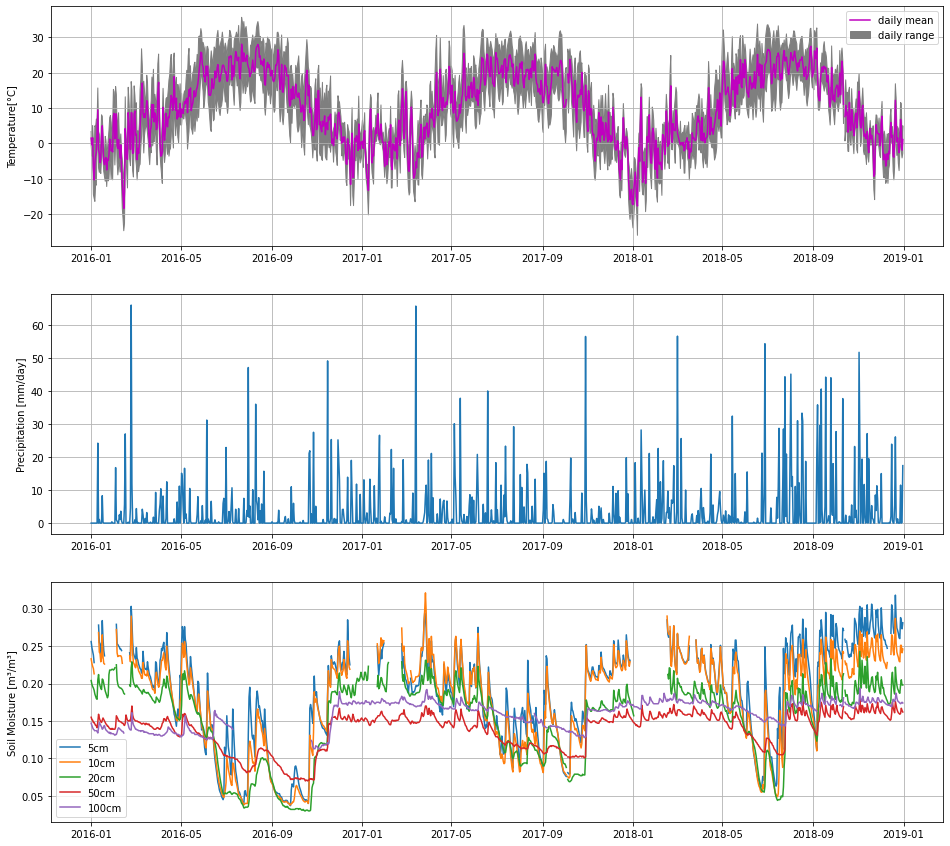

In [8]:
fig, ax = plt.subplots(figsize = (16,15), nrows = 3)
ax[0].plot(date, t_daily_mean, color = 'm', label = 'daily mean');
ax[0].fill_between(date, t_daily_min, t_daily_max, color = 'tab:gray', label = 'daily range');
ax[0].set_ylabel('Temperature[°C]')
ax[0].legend()

ax[1].plot(date, p_daily_calc);
ax[1].set_ylabel('Precipitation [mm/day]')

ax[2].plot(date, soil_moisture_5, label = '5cm');
ax[2].plot(date, soil_moisture_10,label = '10cm');
ax[2].plot(date, soil_moisture_20, label = '20cm');
ax[2].plot(date, soil_moisture_50, label = '50cm');
ax[2].plot(date, soil_moisture_100, label = '100cm');
ax[2].set_ylabel('Soil Moisture [m³/m³]');
ax[2].legend()
ax[2].legend( loc='lower left')

for i in range(0,3):
    ax[i].grid(which='minor')
    ax[i].grid(which='major')

![fig1](more_matplotlib_figures/fig1.png)

### Problem 2: Contour Plots

Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis.

In [9]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

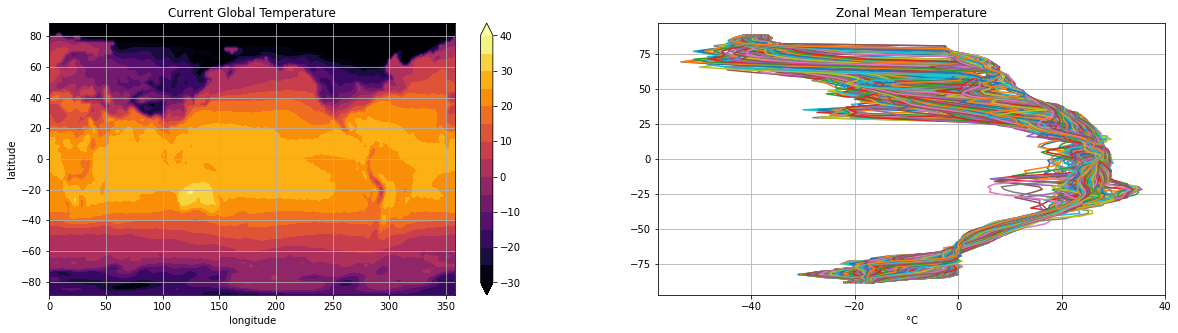

In [11]:
fig, ax = plt.subplots(figsize=(20, 5), ncols=2)
clevels = np.arange(-30, 45, 5)

cf0 = ax[0].contourf(lon, lat, temp, clevels, cmap='inferno', extend='both');
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].set_title('Current Global Temperature')
plt.colorbar(cf0, ax=ax[0]);
    
cf1 = ax[1].plot(temp, lat);
ax[1].set_xlabel('°C')
ax[1].set_title('Zonal Mean Temperature')

for i in range(0,2):
    ax[i].grid(which='minor')
    ax[i].grid(which='major')

![fig2](more_matplotlib_figures/fig2.png)

### Problem 3: Scatter plots
Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magntiude$^4$/100

In [11]:
!curl -L -o earthquakes.tsv "https://drive.google.com/uc?export=download&id=1dFZ4LbwNaw-Gr0G-ZlPAZ17n2qCkdQBP"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    557      0 --:--:-- --:--:-- --:--:--   556
100  796k  100  796k    0     0   939k      0 --:--:-- --:--:-- --:--:--  939k


In [12]:
import numpy as np

In [19]:
#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOT!
#########################################################

earthquakes = np.genfromtxt('earthquakes.tsv', delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

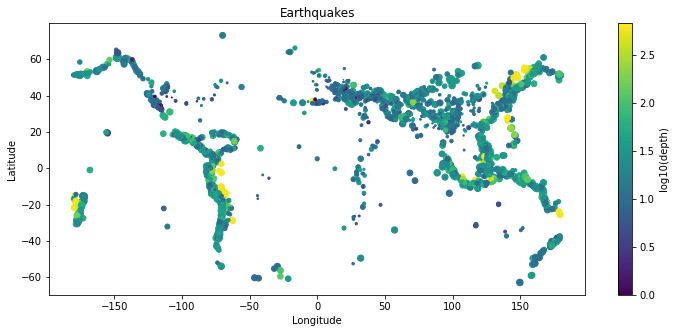

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
plt.scatter(x=longitude,y=latitude,sizes=(magnitude**4)/100,c=np.log10(depth));
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquakes")
cbar = plt.colorbar();
cbar.set_label('log10(depth)')